In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shilajitroy","key":"33d78dd4b12763a478808ad29b48283a"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/heart-attack-dataset                               ❤️ Heart Attack Risk Factors Dataset                 9KB  2024-08-06 10:57:42           1216         25  1.0              
youssefismail20/olympic-games-1994-2024                    Olympic Games (1994-2024) 🏅🌍                        16KB  2024-08-08 12:56:36           1131         26  1.0              
myrios/cost-of-living-index-by-country-by-number-2024      Cost of Living Index by Country                      3KB  2024-07-19 06:25:42           2833         41  1.0              
muhammadehsan000/credit-card-transaction-records-dataset   Credit Card Transaction Records

In [5]:
'''import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')'''
import math
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
db_smoke_detection = pd.read_csv("/content/gdrive/MyDrive/smoke_detection_iot.csv" )

In [7]:
db_smoke_detection.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [8]:
db_smoke_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [9]:
db_smoke_detection.isnull().sum()

,0
Unnamed: 0,0
UTC,0
Temperature[C],0
Humidity[%],0
TVOC[ppb],0
eCO2[ppm],0
Raw H2,0
Raw Ethanol,0
Pressure[hPa],0
PM1.0,0


In [10]:
db_smoke_detection.duplicated().sum()


0

In [11]:
tempo_utc = pd.to_datetime(db_smoke_detection['UTC'], unit='s')
tempo_utc

,UTC
0,2022-06-09 00:08:51
1,2022-06-09 00:08:52
2,2022-06-09 00:08:53
3,2022-06-09 00:08:54
4,2022-06-09 00:08:55
...,...
62625,2022-06-13 14:20:47
62626,2022-06-13 14:20:48
62627,2022-06-13 14:20:49
62628,2022-06-13 14:20:50


In [12]:
tempo_utc.dt.month.value_counts()

,count
UTC,
6,62630


In [13]:
tempo_utc.dt.year.value_counts()

,count
UTC,
2022,62630


In [14]:
len(db_smoke_detection['Unnamed: 0'].unique())

62630

In [15]:
len(db_smoke_detection['CNT'].unique())

24994

In [16]:
db_smoke_detection = db_smoke_detection.drop(['UTC', 'Unnamed: 0', 'CNT'], axis=1)
db_smoke_detection

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


In [17]:
db_smoke_detection['TemperatureCat'] = db_smoke_detection['Temperature[C]'].map(lambda x: 'Very low' if x<0 else ('Low' if x<10 else ('Moderate' if x<20 else ('High' if x<30 else 'Very high'))))
db_smoke_detection['TemperatureCat']

,TemperatureCat
0,High
1,High
2,High
3,High
4,High
...,...
62625,Moderate
62626,Moderate
62627,Moderate
62628,Moderate


In [18]:
db_smoke_detection['HumidityCat'] = db_smoke_detection['Humidity[%]'].map(lambda x: 'Low' if x<30 else ('Moderate' if x<60 else 'High'))
db_smoke_detection['HumidityCat']

,HumidityCat
0,Moderate
1,Moderate
2,Moderate
3,Moderate
4,Moderate
...,...
62625,Low
62626,Low
62627,Low
62628,Low


In [19]:
db_smoke_detection['SmokeDetec'] = db_smoke_detection['Fire Alarm'].map(lambda x: 'Yes' if x == 1 else 'No')
db_smoke_detection['SmokeDetec']

,SmokeDetec
0,No
1,No
2,No
3,No
4,No
...,...
62625,No
62626,No
62627,No
62628,No


In [20]:
db_smoke_detection['TotalNC'] = db_smoke_detection['NC0.5']+db_smoke_detection['NC1.0']+db_smoke_detection['NC2.5']
db_smoke_detection['TotalNC']

,TotalNC
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
62625,5.008
62626,4.847
62627,4.581
62628,4.545


In [21]:
db_smoke_detection['TotalPM'] = db_smoke_detection['PM1.0']+db_smoke_detection['PM2.5']
db_smoke_detection['TotalPM']

,TotalPM
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
62625,1.28
62626,1.24
62627,1.17
62628,1.16


In [22]:
db_quantitativos = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'TotalPM','TotalNC']
db_qualitativos = ['TemperatureCat', 'HumidityCat', 'SmokeDetec']

In [23]:
db_smoke_detection[db_quantitativos].describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],TotalPM,TotalNC
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,285.062079,775.099138
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,2871.098195,7042.638525
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,2.630000,10.227000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,3.690000,14.436000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,4.270000,16.719000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,59731.400000,104063.534000


In [24]:
db_smoke_detection[db_quantitativos].mean()

,0
Temperature[C],15.970424
Humidity[%],48.539499
TVOC[ppb],1942.057528
eCO2[ppm],670.021044
Raw H2,12942.453936
Raw Ethanol,19754.257912
Pressure[hPa],938.627649
TotalPM,285.062079
TotalNC,775.099138


In [25]:
temp_freq = db_smoke_detection['TemperatureCat'].value_counts()
temp_perc = db_smoke_detection['TemperatureCat'].value_counts(normalize=True)*100
tb_temp = pd.DataFrame({'Frequency': temp_freq,
                        'Percentage': temp_perc.map('{:.2f}%'.format)})
tb_temp.iloc[[2,3,1,0,4]]   #Frequency and percentage of qualitative attributes

,Frequency,Percentage
TemperatureCat,,
Very low,12024,19.20%
Low,3277,5.23%
Moderate,15470,24.70%
High,29233,46.68%
Very high,2626,4.19%


In [26]:
hum_freq = db_smoke_detection['HumidityCat'].value_counts()
hum_perc = db_smoke_detection['HumidityCat'].value_counts(normalize=True)*100
tb_hum = pd.DataFrame({'Frequency': hum_freq,
                       'Percentage': hum_perc.map('{:.2f}%'.format)})
tb_hum.iloc[[1,0,2]]

,Frequency,Percentage
HumidityCat,,
Low,3664,5.85%
Moderate,57898,92.44%
High,1068,1.71%


In [27]:
smoke_freq = db_smoke_detection['SmokeDetec'].value_counts()
smoke_perc = db_smoke_detection['SmokeDetec'].value_counts(normalize=True)*100
tb_smoke = pd.DataFrame({'Frequência': smoke_freq,
                         'Percentual': smoke_perc.map('{:.2f}%'.format)})
tb_smoke

,Frequência,Percentual
SmokeDetec,,
Yes,44757,71.46%
No,17873,28.54%


In [28]:
db_smoke_detection[db_smoke_detection['Fire Alarm'] == 1][db_quantitativos].describe()
# Analysis of the statistical description for the activated fire alarm

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],TotalPM,TotalNC
count,44757.000000,44757.000000,44757.000000,44757.000000,44757.000000,44757.000000,44757.000000,44757.000000,44757.000000
mean,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,114.564248,274.318513
std,13.825585,5.937239,548.606072,1275.260976,167.385665,307.123385,1.309030,2072.245341,4423.518129
min,-22.010000,13.360000,0.000000,400.000000,10939.000000,17809.000000,930.852000,0.310000,1.229000
25%,5.179000,48.390000,332.000000,400.000000,12861.000000,19427.000000,938.731000,3.240000,12.661000
50%,20.020000,51.400000,1103.000000,404.000000,12933.000000,19454.000000,938.878000,3.810000,14.910000
75%,24.730000,53.470000,1208.000000,480.000000,13086.000000,19918.000000,939.290000,4.360000,17.090000
max,41.410000,70.280000,18062.000000,60000.000000,13637.000000,21109.000000,939.771000,59731.400000,104063.534000


In [29]:
db_smoke_detection[db_smoke_detection['Fire Alarm'] == 0][db_quantitativos].describe()
# Analysis of the statistical description of the data for the deactivated fire alarm

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],TotalPM,TotalNC
count,17873.000000,17873.000000,17873.000000,17873.000000,17873.000000,17873.000000,17873.000000,17873.000000,17873.000000
mean,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,712.017345,2029.138101
std,14.982932,11.962854,14255.575585,2921.749928,432.441620,956.339624,1.237957,4228.222946,11072.787181
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,931.131000,0.000000,0.000000
25%,13.560000,41.000000,21.000000,400.000000,12775.000000,19932.000000,937.330000,1.410000,5.508000
50%,20.540000,46.140000,86.000000,400.000000,12837.000000,20158.000000,937.478000,2.970000,11.571000
75%,26.919000,50.300000,182.000000,417.000000,13147.000000,20629.000000,939.631000,3.950000,15.456000
max,59.930000,75.200000,60000.000000,39185.000000,13803.000000,21410.000000,939.861000,54609.670000,97032.394000


In [30]:
db_smoke_detection[db_smoke_detection['Fire Alarm'] == 1][db_quantitativos].median().map('{:.2f}'.format)

,0
Temperature[C],20.02
Humidity[%],51.40
TVOC[ppb],1103.00
eCO2[ppm],404.00
Raw H2,12933.00
Raw Ethanol,19454.00
Pressure[hPa],938.88
TotalPM,3.81
TotalNC,14.91


In [31]:
db_smoke_detection[db_smoke_detection['Fire Alarm'] == 0][db_quantitativos].median().map('{:.2f}'.format)

,0
Temperature[C],20.54
Humidity[%],46.14
TVOC[ppb],86.00
eCO2[ppm],400.00
Raw H2,12837.00
Raw Ethanol,20158.00
Pressure[hPa],937.48
TotalPM,2.97
TotalNC,11.57


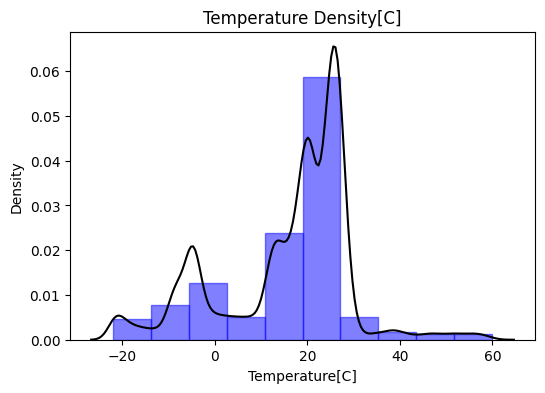

In [32]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'Temperature[C]', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Temperature Density[C]")
sns.kdeplot(db_smoke_detection['Temperature[C]'].dropna(), color='black')

plt.show()

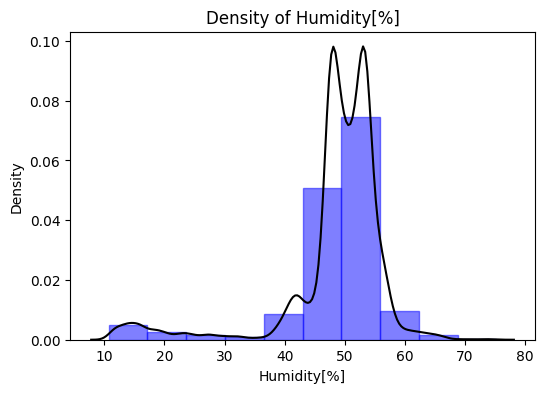

In [33]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'Humidity[%]', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of Humidity[%]")
sns.kdeplot(db_smoke_detection['Humidity[%]'].dropna(), color='black')

plt.show()

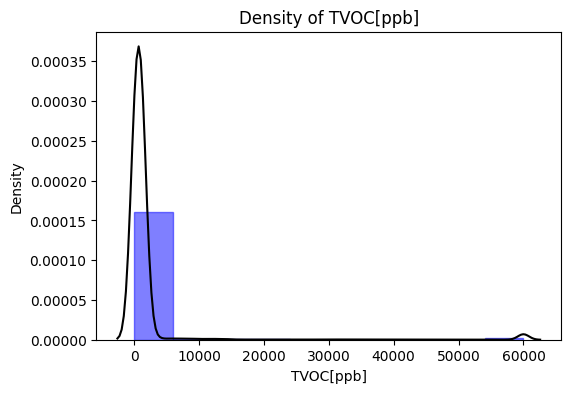

In [34]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'TVOC[ppb]', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of TVOC[ppb]")
sns.kdeplot(db_smoke_detection['TVOC[ppb]'].dropna(), color='black')

plt.show()

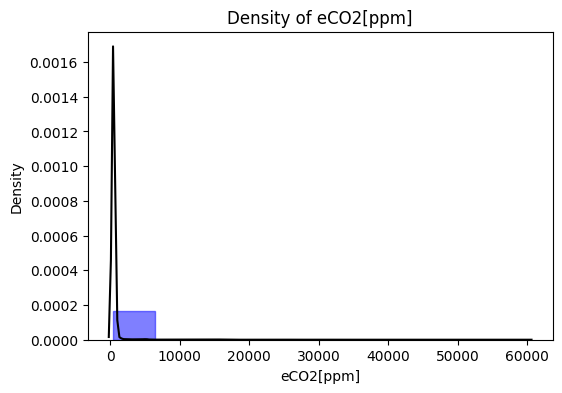

In [35]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'eCO2[ppm]', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of eCO2[ppm]")
sns.kdeplot(db_smoke_detection['eCO2[ppm]'].dropna(), color='black')

plt.show()

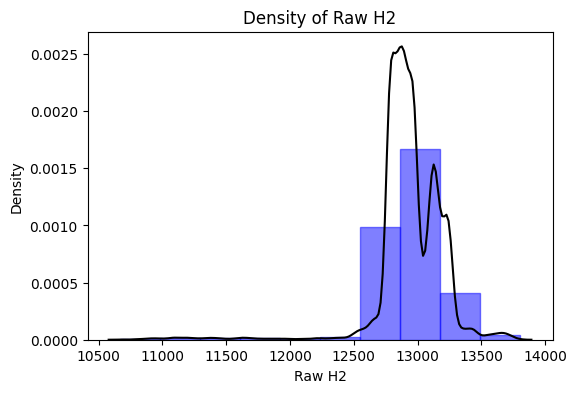

In [36]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'Raw H2', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of Raw H2")
sns.kdeplot(db_smoke_detection['Raw H2'].dropna(), color='black')

plt.show()

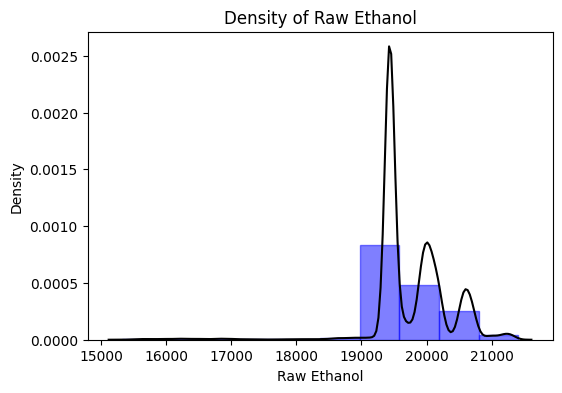

In [37]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'Raw Ethanol', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of Raw Ethanol")
sns.kdeplot(db_smoke_detection['Raw Ethanol'].dropna(), color='black')

plt.show()

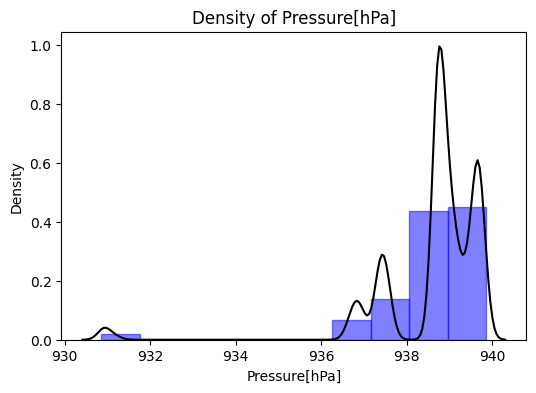

In [38]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'Pressure[hPa]', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of Pressure[hPa]")
sns.kdeplot(db_smoke_detection['Pressure[hPa]'].dropna(), color='black')

plt.show()

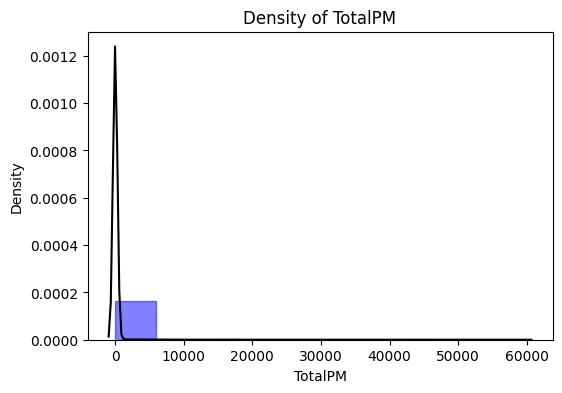

In [39]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'TotalPM', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of TotalPM")
sns.kdeplot(db_smoke_detection['TotalPM'].dropna(), color='black')

plt.show()

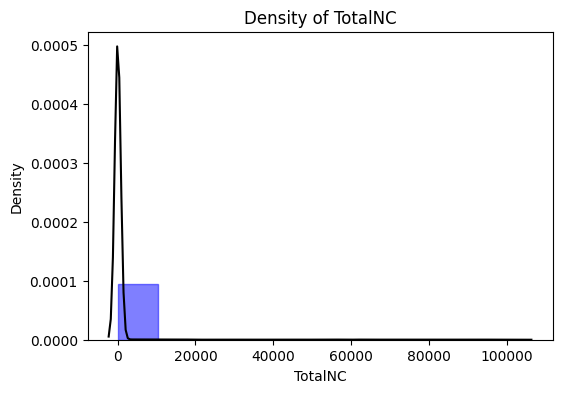

In [40]:
plt.figure(figsize=[6,4])

plt.hist(data = db_smoke_detection, x = 'TotalNC', color='blue', histtype='bar', rwidth=2, edgecolor='blue', density=True, alpha=.5)
plt.title("Density of TotalNC")
sns.kdeplot(db_smoke_detection['TotalNC'].dropna(), color='black')

plt.show()

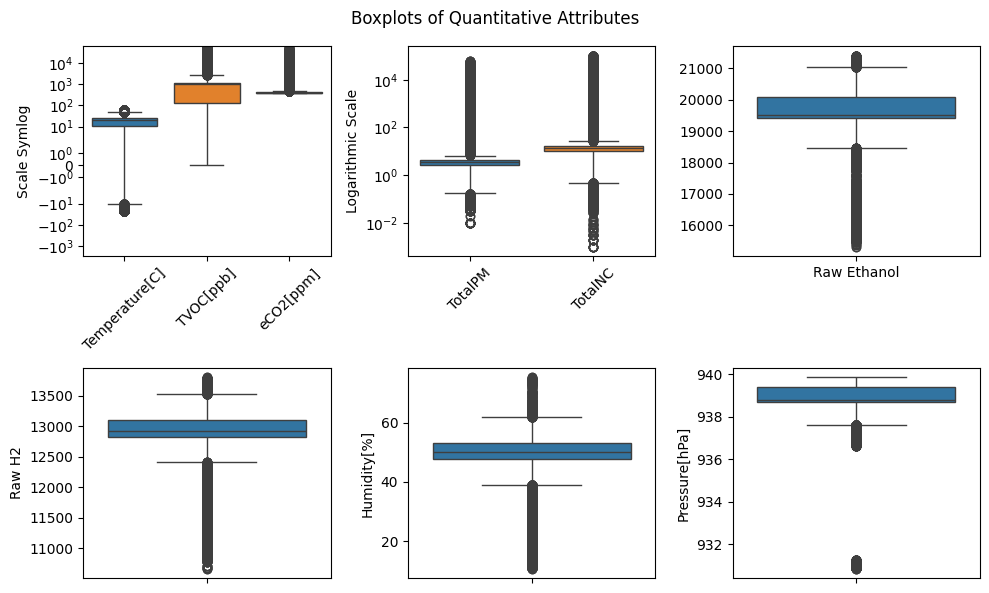

In [41]:
plt.figure(figsize=(10, 6))

plt. subplot(2,3,1)
sns.boxplot(db_smoke_detection[['Temperature[C]', 'TVOC[ppb]', 'eCO2[ppm]']])
plt.yscale('symlog')
plt.ylabel('Scale Symlog')
plt.xticks(rotation=45)

plt.subplot(2,3,2)
sns.boxplot(data=db_smoke_detection[['TotalPM', 'TotalNC']])
plt.yscale('log')
plt.ylabel('Logarithmic Scale')
plt.xticks(rotation=45)

plt.subplot(2,3,3)
sns.boxplot(db_smoke_detection[['Raw Ethanol']])

plt.subplot(2,3,4)
sns.boxplot(db_smoke_detection['Raw H2'])

plt.subplot(2,3,5)
sns.boxplot(db_smoke_detection['Humidity[%]'])

plt.subplot(2,3,6)
sns.boxplot(db_smoke_detection['Pressure[hPa]'])

plt.suptitle('Boxplots of Quantitative Attributes')
plt.tight_layout()
plt.show()

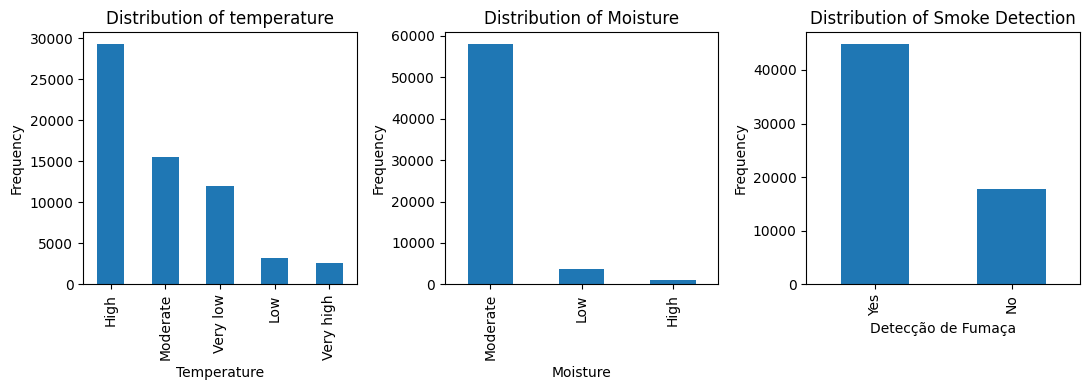

In [42]:
plt.figure(figsize = [11,4])

plt.subplot(1,3,1)
db_smoke_detection['TemperatureCat'].value_counts().plot(kind = 'bar')
plt.title("Distribution of temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
db_smoke_detection['HumidityCat'].value_counts().plot(kind='bar')
plt.title("Distribution of Moisture")
plt.xlabel("Moisture")
plt.ylabel("Frequency")

plt.subplot(1,3,3)
db_smoke_detection['SmokeDetec'].value_counts().plot(kind='bar')
plt.title("Distribution of Smoke Detection")
plt.xlabel("Detecção de Fumaça")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [43]:
crossTempSmoke = pd.crosstab(db_smoke_detection.TemperatureCat, db_smoke_detection.SmokeDetec, margins=True)
crossTempSmoke

SmokeDetec,No,Yes,All
TemperatureCat,,,
High,7682,21551,29233
Low,661,2616,3277
Moderate,5564,9906,15470
Very high,1719,907,2626
Very low,2247,9777,12024
All,17873,44757,62630


In [44]:
crossTempSmokeRelativa = pd.crosstab(db_smoke_detection.TemperatureCat, db_smoke_detection.SmokeDetec, normalize='columns', margins=True)
crossTempSmokeRelativa

SmokeDetec,No,Yes,All
TemperatureCat,,,
High,0.429810,0.481511,0.466757
Low,0.036983,0.058449,0.052323
Moderate,0.311308,0.221329,0.247006
Very high,0.096179,0.020265,0.041929
Very low,0.125720,0.218446,0.191985


In [45]:
crossTempSmokePercLinha = pd.crosstab(db_smoke_detection.TemperatureCat, db_smoke_detection.SmokeDetec, normalize='index', margins=True).round(3)*100
crossTempSmokePercLinha

SmokeDetec,No,Yes
TemperatureCat,,
High,26.3,73.7
Low,20.2,79.8
Moderate,36.0,64.0
Very high,65.5,34.5
Very low,18.7,81.3
All,28.5,71.5


In [46]:
crossTempSmokePercTotal = pd.crosstab(db_smoke_detection.TemperatureCat, db_smoke_detection.SmokeDetec, normalize=True, margins=True).round(3)*100
crossTempSmokePercTotal

SmokeDetec,No,Yes,All
TemperatureCat,,,
High,12.3,34.4,46.7
Low,1.1,4.2,5.2
Moderate,8.9,15.8,24.7
Very high,2.7,1.4,4.2
Very low,3.6,15.6,19.2
All,28.5,71.5,100.0


In [47]:
crossHumidSmoke = pd.crosstab(db_smoke_detection.HumidityCat, db_smoke_detection.SmokeDetec, margins=True)
crossHumidSmoke

SmokeDetec,No,Yes,All
HumidityCat,,,
High,218,850,1068
Low,2798,866,3664
Moderate,14857,43041,57898
All,17873,44757,62630


In [48]:
crossHumidSmokeRelativa = pd.crosstab(db_smoke_detection.HumidityCat, db_smoke_detection.SmokeDetec, normalize='columns', margins=True)
crossHumidSmokeRelativa

SmokeDetec,No,Yes,All
HumidityCat,,,
High,0.012197,0.018991,0.017053
Low,0.156549,0.019349,0.058502
Moderate,0.831254,0.961660,0.924445


In [49]:
crossHumidSmokePercLinha = pd.crosstab(db_smoke_detection.HumidityCat, db_smoke_detection.SmokeDetec, normalize='index', margins=True).round(3)*100
crossHumidSmokePercLinha

SmokeDetec,No,Yes
HumidityCat,,
High,20.4,79.6
Low,76.4,23.6
Moderate,25.7,74.3
All,28.5,71.5


In [50]:
crossHumidSmokePercTotal = pd.crosstab(db_smoke_detection.HumidityCat, db_smoke_detection.SmokeDetec, normalize=True, margins=True).round(3)*100
crossHumidSmokePercTotal

SmokeDetec,No,Yes,All
HumidityCat,,,
High,0.3,1.4,1.7
Low,4.5,1.4,5.9
Moderate,23.7,68.7,92.4
All,28.5,71.5,100.0


In [51]:
db_smoke_detection[db_quantitativos+['Fire Alarm']].corr()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],TotalPM,TotalNC,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.034079,0.037665,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.199135,-0.241031,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.520575,0.606222,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.608037,0.671384,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.467257,-0.537910,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.425107,-0.486949,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.250517,-0.259271,0.249797
TotalPM,0.034079,-0.199135,0.520575,0.608037,-0.467257,-0.425107,-0.250517,1.000000,0.973322,-0.093974
TotalNC,0.037665,-0.241031,0.606222,0.671384,-0.537910,-0.486949,-0.259271,0.973322,1.000000,-0.112525
Fire Alarm,-0.163902,0.399846,-0.214743,-0.097006,0.107007,-0.340652,0.249797,-0.093974,-0.112525,1.000000


In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [53]:
atributos_num = db_quantitativos + ['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
atributos_cat = db_qualitativos[0:2]

In [54]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
db_numeric_tr = pd.DataFrame(num_pipeline.fit_transform(db_smoke_detection[atributos_num]), columns=atributos_num)
db_numeric_tr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],TotalPM,TotalNC,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.280622,0.994947,-0.248614,-0.141679,-2.335935,-2.025006,0.831761,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
1,0.281666,0.917115,-0.248614,-0.141679,-2.192796,-1.810079,0.838521,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
2,0.282641,0.837028,-0.248614,-0.141679,-2.086359,-1.624683,0.834014,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
3,0.283686,0.760324,-0.248614,-0.141679,-2.027636,-1.485227,0.832512,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
4,0.284730,0.693773,-0.248614,-0.141679,-1.979923,-1.367099,0.838521,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.171843,-3.694123,-0.168604,-0.141679,2.864787,1.336720,-1.470443,-0.098842,-0.109348,-0.108360,-0.093012,-0.114202,-0.091620,-0.073875
62626,0.186816,-3.685100,-0.170269,-0.141679,2.894149,1.367893,-1.464434,-0.098856,-0.109371,-0.108382,-0.093022,-0.114235,-0.091630,-0.073875
62627,0.201719,-3.688484,-0.168348,-0.141679,2.872128,1.358049,-1.457674,-0.098880,-0.109408,-0.108425,-0.093037,-0.114289,-0.091646,-0.073876
62628,0.216761,-3.665924,-0.166940,-0.141679,2.824415,1.331798,-1.462932,-0.098884,-0.109414,-0.108425,-0.093042,-0.114296,-0.091648,-0.073876


In [55]:
lb = LabelEncoder()
db_category_tr = db_smoke_detection.loc[:,atributos_cat]
for c in atributos_cat:
  db_category_tr[c] = lb.fit_transform(db_smoke_detection[c])
db_category_tr

,TemperatureCat,HumidityCat
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2
...,...,...
62625,2,1
62626,2,1
62627,2,1
62628,2,1


In [56]:
db_smoke_detection_tr = pd.concat([db_numeric_tr, db_category_tr], axis=1)
db_smoke_detection_tr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],TotalPM,TotalNC,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TemperatureCat,HumidityCat
0,0.280622,0.994947,-0.248614,-0.141679,-2.335935,-2.025006,0.831761,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889,0,2
1,0.281666,0.917115,-0.248614,-0.141679,-2.192796,-1.810079,0.838521,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889,0,2
2,0.282641,0.837028,-0.248614,-0.141679,-2.086359,-1.624683,0.834014,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889,0,2
3,0.283686,0.760324,-0.248614,-0.141679,-2.027636,-1.485227,0.832512,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889,0,2
4,0.284730,0.693773,-0.248614,-0.141679,-1.979923,-1.367099,0.838521,-0.099288,-0.110059,-0.109043,-0.093340,-0.115215,-0.091924,-0.073889,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,0.171843,-3.694123,-0.168604,-0.141679,2.864787,1.336720,-1.470443,-0.098842,-0.109348,-0.108360,-0.093012,-0.114202,-0.091620,-0.073875,2,1
62626,0.186816,-3.685100,-0.170269,-0.141679,2.894149,1.367893,-1.464434,-0.098856,-0.109371,-0.108382,-0.093022,-0.114235,-0.091630,-0.073875,2,1
62627,0.201719,-3.688484,-0.168348,-0.141679,2.872128,1.358049,-1.457674,-0.098880,-0.109408,-0.108425,-0.093037,-0.114289,-0.091646,-0.073876,2,1
62628,0.216761,-3.665924,-0.166940,-0.141679,2.824415,1.331798,-1.462932,-0.098884,-0.109414,-0.108425,-0.093042,-0.114296,-0.091648,-0.073876,2,1


In [57]:
X = db_smoke_detection_tr
Y = db_smoke_detection['Fire Alarm']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=7, shuffle=True)

In [58]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((50104, 16), (12526, 16), (50104,), (12526,))

In [59]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighborsClassification': KNeighborsClassifier(),
    'Decision Tree Classification': DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'SVM': SVC(),
    'MLP Classifier': MLPClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}
results ={
    #'Logistic Regression': [],
    #'KNeighborsClassification': [],
    #'Decision Tree Classification': [],
    #'NB': [],
    #'SVM': [],
    #'MLP Classifier': [],
    #'Random Forest Classifier': [],
    'Model': [],
    'Average Accuracy': [],
    'Standard Deviation': []
}
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
for name, model in models.items():
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  results['Model'].append(name)
  results['Average Accuracy'].append(np.mean(cv_results))
  results['Standard Deviation'].append(np.std(cv_results))

In [60]:
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [61]:
cv_results

array([1.        , 1.        , 0.99984033, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [62]:
lr = LinearRegression()
cv_lr= cross_val_score(lr, X, Y, cv=kfold, scoring='neg_mean_squared_error')
results['Model'].append('Linear Regression')
results['Average Accuracy'].append(np.mean(cv_lr))
results['Standard Deviation'].append(np.std(cv_lr))

In [63]:
#Model Comprasssion
df_cv_results = pd.DataFrame(results)
df_cv_results = df_cv_results.sort_values(by='Average Accuracy', ascending=False)
df_cv_results

,Model,Average Accuracy,Standard Deviation
6,Random Forest Classifier,0.999984,0.000048
2,Decision Tree Classification,0.999904,0.000106
5,MLP Classifier,0.998818,0.000379
1,KNeighborsClassification,0.998707,0.000522
4,SVM,0.972106,0.002160
0,Logistic Regression,0.912805,0.002255
3,NB,0.762606,0.005175
7,Linear Regression,-0.087741,0.001771


In [64]:
#Implementaion random forest model
random_f = RandomForestClassifier()
random_f.fit(X_train, Y_train)
anticipated=random_f.predict(X_validation)
anticipated

array([0, 1, 1, ..., 1, 0, 0])

In [65]:
Y_validation.values,anticipated

(array([0, 1, 1, ..., 1, 0, 0]), array([0, 1, 1, ..., 1, 0, 0]))

In [66]:
print('Classification Report - Logistic Regression: \n',classification_report(Y_validation, anticipated))

Classification Report - Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3535
           1       1.00      1.00      1.00      8991

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


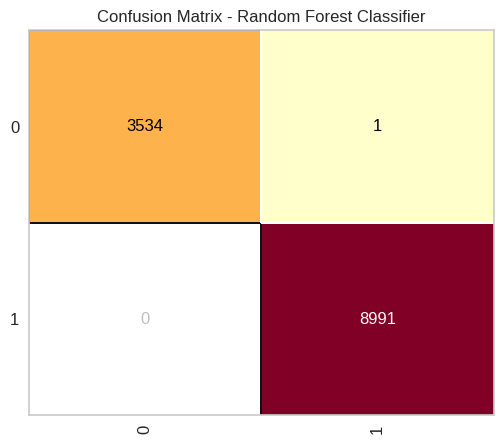

In [67]:
plt.figure(figsize=(6,5))
cm = ConfusionMatrix(random_f)
cm.fit(X_train, Y_train)
cm.score(X_validation, Y_validation)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()